In [1566]:
import pandas as pd
from glob import glob
import random
import Stemmer
import emoji
import re
import matplotlib.pyplot as plt
from abc import ABC, abstractmethod
from num2words import num2words

random.seed(20)

In [1567]:
appos = {
    "aren't" : "are not",
    "can't" : "cannot",
    "couldn't" : "could not",
    "didn't" : "did not",
    "doesn't" : "does not",
    "don't" : "do not",
    "hadn't" : "had not",
    "hasn't" : "has not",
    "haven't" : "have not",
    "he'd" : "he would",
    "he'll" : "he will",
    "he's" : "he is",
    "how's" : "how is",
    "i'd" : "i would",
    "i'll" : "i will",
    "i'm" : "i am",
    "i've" : "i have",
    "isn't" : "is not",
    "it's" : "it is",
    "let's" : "let us",
    "mustn't" : "must not",
    "shan't" : "shall not",
    "she'd" : "she would",
    "she'll" : "she will",
    "she's" : "she is",
    "shouldn't" : "should not",
    "that's" : "that is",
    "there's" : "there is",
    "they'd" : "they would",
    "they'll" : "they will",
    "they're" : "they are",
    "they've" : "they have",
    "wasn't" : "was not",
    "we'd" : "we would",
    "we'll" : "we will",
    "we're" : "we are",
    "we've" : "we have",
    "weren't" : "were not",
    "what's" : "what is",
    "where's" : "where is",
    "who's" : "who is",
    "won't" : "will not",
    "wouldn't" : "would not",
    "you'd" : "you would",
    "you'll" : "you will",
    "you're" : "you are",
    "you've" : "you have",
    "y'all" : "you all",
}

stop_words = {
    "i", "a", "an", "the", "in", "on", "at", "to", 
    "and", "or", "but", "is", "am", "are", "was", 
    "it", "they", "this", "of", "for", "with", 
    "as", "by", "from", "that", "those", "these",
    
    "he", "she", "we", "you", "me", "him", "her", 
    "us", "them", "my", "your", "our", "their", 
    "do", "does", "did", "have", "has", "had", 
    "about", "above", "across", "after", "against", 
    "along", "among", "around", "behind", "below", 
    "beneath", "beside", "between", "beyond", 
    "despite", "during", "except", "into", "near", 
    "off", "over", "past", "through", "toward", 
    "under", "until", "up", "upon", "via", "within", 
    "without", "although", "because", "since", 
    "unless", "while", "where", "whether", "any", 
    "each", "every", "either", "neither", "some", 
    "such", "both", "few", "many", "several", "all", 
    "other", "same", "so", "too","when"
}

negation_words = {
    "not", "no", "never", "none", "nobody", "nothing", "nowhere",
    "neither", "nor", "without", "cannot", "can't", "couldn't",
    "didn't", "doesn't", "don't", "hadn't", "hasn't", "haven't",
    "isn't", "mightn't", "mustn't", "needn't", "oughtn't", "shan't",
    "shouldn't", "wasn't", "weren't", "won't", "wouldn't", "rarely",
    "scarcely", "hardly", "barely", "little", "few", "lack", "lacking",
    "deny", "denies", "denied", "denying", "refuse", "refuses",
    "refused", "refusing", "reject", "rejects", "rejected", "rejecting"
}

positive_words = {
    "good", "great", "excellent", "awesome", "amazing", "wonderful",
    "fantastic", "perfect", "outstanding", "superb", "brilliant", "fabulous",
    "terrific", "incredible", "lovely", "delightful", "joyful", "happy",
    "joy", "bliss", "ecstatic", "pleasure", "vibrant", "optimistic",
    "positive", "success", "victory", "triumph", "peace", "harmony",
    "gratitude", "thankful", "blessed", "lucky", "prosperous", "rewarding",
    "satisfying", "refreshing", "inspiring", "motivating", "encouraging",
    "kind", "generous", "compassionate", "honest", "trustworthy", "loyal",
    "creative", "innovative", "energetic", "vital", "healthy", "strong",
    "courageous", "bold", "confident", "resilient", "graceful", "elegant",
    "charming", "friendly", "welcoming", "supportive", "helpful", "heavenly",
    "divine", "magical", "serene", "calm", "relaxed", "bright", "shining",
    "glowing", "sparkling", "clean", "pure", "fresh", "new", "exciting",
    "thrilling", "adventurous", "fun", "playful", "humorous", "lighthearted",
    "smiling", "laughing", "cheerful", "jubilant", "celebratory", "festive",
    "colorful", "beautiful", "stunning", "gorgeous", "radiant", "dazzling",
    "admire", "cherish", "treasure", "love", "adore", "passion", "devotion","smilingfacewithhearteyes"
}

negative_words = {
    "bad", "terrible", "awful", "horrible", "worst", "disgusting",
    "hate", "loathe", "despise", "abhor", "ugly", "painful",
    "sad", "unhappy", "miserable", "depressed", "gloomy", "sorrow",
    "failure", "disaster", "mess", "broken", "damaged", "defective",
    "angry", "furious", "enraged", "annoyed", "irritated", "frustrated",
    "evil", "wicked", "cruel", "mean", "selfish", "greedy", "corrupt",
    "harmful", "dangerous", "toxic", "poisonous", "deadly", "violent",
    "stupid", "idiotic", "foolish", "ridiculous", "nonsense", "absurd",
    "boring", "dull", "tedious", "monotonous", "lame", "uninteresting",
    "weak", "frail", "feeble", "helpless", "hopeless", "useless",
    "scary", "frightening", "terrifying", "horrifying", "creepy",
    "lonely", "isolated", "abandoned", "rejected", "betrayed", "ignored",
    "stress", "anxiety", "fear", "panic", "dread", "worry",
    "disappointment", "regret", "shame", "guilt", "embarrassment", "humiliation",
    "problem", "issue", "mistake", "error", "flaw", "defect",
    "conflict", "fight", "argument", "quarrel", "dispute", "war",
    "polluted", "dirty", "filthy", "rotten", "decaying", "waste",
    "fake", "fraud", "lie", "cheat", "deceive", "manipulate",
    "sick", "ill", "pain", "ache", "suffering", "agony",
    "loss", "defeat", "collapse", "crash", "bankrupt", "ruin"
}

positive_emojis = {
    ":grinning_face:", ":beaming_face_with_smiling_eyes:", ":grinning_face_with_sweat:",
    ":rolling_on_the_floor_laughing:", ":face_with_tears_of_joy:", ":smiling_face:",
    ":smiling_face_with_halo:", ":smiling_face_with_hearts:", ":smiling_face_with_heart-eyes:",
    ":star-struck:", ":kissing_face:", ":kissing_face_with_closed_eyes:",
    ":kissing_face_with_smiling_eyes:", ":heart_eyes:", ":face_blowing_a_kiss:",
    ":hugging_face:", ":thumbs_up:", ":clapping_hands:", ":folded_hands:", ":handshake:",
    ":sparkles:", ":fire:", ":rocket:", ":party_popper:", ":confetti_ball:", ":tada:",
    ":balloon:", ":red_heart:", ":orange_heart:", ":yellow_heart:", ":green_heart:",
    ":blue_heart:", ":purple_heart:", ":sparkling_heart:", ":heart_with_arrow:",
    ":revolving_hearts:", ":two_hearts:", ":growing_heart:", ":heartpulse:",
    ":star:", ":glowing_star:", ":sun:", ":sun_with_face:", ":rainbow:", ":flower_playing_cards:",
    ":cherry_blossom:", ":rose:", ":hibiscus:", ":sunflower:", ":tulip:", ":bouquet:",
    ":palm_tree:", ":christmas_tree:", ":four_leaf_clover:", ":shamrock:", ":maple_leaf:",
    ":fallen_leaf:", ":herb:", ":potted_plant:", ":seedling:", ":crown:", ":trophy:",
    ":medal:", ":musical_notes:", ":musical_note:", ":party_face:", ":dancer:", ":man_dancing:",
    ":woman_dancing:", ":man_in_tuxedo:", ":princess:", ":superhero:", ":rocket:", ":airplane:",
    ":checkered_flag:", ":trophy:", ":1st_place_medal:", ":money_with_wings:", ":dollar_banknote:",
    ":money_bag:", ":gem_stone:", ":ring:", ":gift:", ":birthday_cake:", ":champagne:",
    ":clinking_glasses:", ":beers:", ":chocolate_bar:", ":ice_cream:", ":doughnut:",
    ":cookie:", ":cake:", ":pizza:", ":hamburger:", ":taco:", ":burrito:", ":sushi:",
    ":ramen:", ":spaghetti:", ":wine_glass:", ":hot_beverage:", ":teacup_without_handle:",
    ":beer_mug:", ":clinking_beer_mugs:", ":champagne_glass:", ":dog_face:", ":cat_face:",
    ":panda_face:", ":koala:", ":unicorn_face:", ":dragon_face:", ":dove:", ":butterfly:",
    ":rainbow_flag:", ":peace_symbol:", ":infinity:", ":recycling_symbol:", ":white_flower:",
}

negative_emojis = {
    ":angry_face:", ":pouting_face:", ":face_with_symbols_on_mouth:", ":smiling_face_with_horns:",
    ":angry_face_with_horns:", ":skull:", ":skull_and_crossbones:", ":crying_face:",
    ":loudly_crying_face:", ":worried_face:", ":slightly_frowning_face:", ":confounded_face:",
    ":disappointed_face:", ":downcast_face:", ":face_with_steam_from_nose:", ":face_screaming_in_fear:",
    ":fearful_face:", ":anxious_face_with_sweat:", ":sad_but_relieved_face:", ":sleepy_face:",
    ":tired_face:", ":yawning_face:", ":face_with_medical_mask:", ":nauseated_face:",
    ":face_vomiting:", ":sneezing_face:", ":cold_face:", ":hot_face:", ":dizzy_face:",
    ":exploding_head:", ":face_with_head-bandage:", ":broken_heart:", ":black_heart:",
    ":thumbs_down:", ":middle_finger:", ":raised_fist:", ":oncoming_fist:", ":collision:",
    ":bomb:", ":fire:", ":dagger:", ":pistol:", ":stop_sign:", ":no_entry:", ":prohibited:",
    ":warning:", ":radioactive:", ":biohazard:", ":anger_symbol:", ":hole:", ":pile_of_poo:",
    ":zombie:", ":ghost:", ":japanese_goblin:", ":japanese_ogre:", ":clown_face:",
    ":crying_cat_face:", ":pouting_cat_face:", ":see-no-evil_monkey:", ":hear-no-evil_monkey:",
    ":speak-no-evil_monkey:", ":footprints:", ":spider:", ":spider_web:", ":snake:", ":rat:",
    ":scorpion:", ":mosquito:", ":microbe:", ":coffin:", ":funeral_urn:", ":stopwatch:",
    ":hourglass_done:", ":hourglass_not_done:", ":cigarette:", ":no_smoking:", ":cactus:",
    ":wilted_flower:", ":volcano:", ":earthquake:", ":tornado:", ":cloud_with_lightning_and_rain:",
    ":droplet:", ":sweat_droplets:", ":dashing_away:", ":dizzy:", ":face_with_thermometer:",
    ":sick:", ":bandage:", ":syringe:", ":pill:", ":test_tube:", ":magnifying_glass_tilted_left:",
    ":chains:", ":handcuffs:", ":locked:", ":locked_with_key:", ":locked_with_pen:"
}

# Create Load Data Class

In [1568]:
class DataLoder:
    def __init__(self,path:str,labels:list[str],shuffle:bool=True):
        self.path = path
        self.labels = labels
        self.shuffle = shuffle
    
    def load_data(self)->pd.DataFrame:
        data=[]
        for label in self.labels:
            for filename in glob(f"{self.path}/{label}/*.txt"):
                with open(filename, "r", encoding="utf-8") as file:
                    text = file.read()
                    data.append({"text":text,"sentiment_label":label})
        if self.shuffle:
            random.shuffle(data)
        df = pd.DataFrame(data)
        return df

In [1569]:
data_load=DataLoder("data/training_data",labels=["neg","pos"],shuffle=True)
sentiment_data=data_load.load_data()
sentiment_data.head(5)

,text,sentiment_label
0,originally entitled dancing about architecture...,pos
1,""" an intimate , character-driven drama about ...",neg
2,the only two really good things that i can say...,neg
3,denzel washington is among the many actors thi...,pos
4,"rated : r for strong language , sexual dialogu...",pos


# Create Preprocessing Classes

In [1570]:
class FeaturesExtractor(ABC):
    @abstractmethod
    def transform(self,text:str):
        pass

class Preprocessing(ABC):
    @abstractmethod
    def transform(self,text:str)->str:
        pass

In [1571]:
class NegationCount(FeaturesExtractor):
    def transform(self,text:str):
        text=text.lower()
        tokens=text.split()
        counter=0
        for token in tokens:
            if token in negation_words:
                counter+=1
        return {
            "neg_word_count":counter
        }

class IngCount(FeaturesExtractor):
    def transform(self,text:str):
        text=RemoveSpecialCharacters().transform(text)
        tokens=text.split()
        counter=0
        for token in tokens:
            if token.endswith("ing"):
                counter+=1
        return {"ing_word_count":counter}

class EdCount(FeaturesExtractor):
    def transform(self,text:str):
        text=RemoveSpecialCharacters().transform(text)
        tokens=text.split()
        counter=0
        for token in tokens:
            if token.endswith("ed"):
                counter+=1
        return {"ed_word_count":counter}

class PositiveWordCount(FeaturesExtractor):
    def transform(self,text:str):
        text=RemoveSpecialCharacters().transform(text)
        tokens=text.split()
        counter=0
        for token in tokens:
            if token in positive_words:
                counter+=1
        return {"positive_word_count":counter}
            
class NegativeWordsCount(FeaturesExtractor):
    def transform(self,text:str):
        text=RemoveSpecialCharacters().transform(text)
        tokens=text.split()
        counter=0
        for token in tokens:
            if token in negative_words:
                counter+=1
        return {"negative_word_count":counter}

class PositiveEmojiCount(FeaturesExtractor):
    def transform(self,text:str):
        text=ConvertEmoji().transform(text)
        tokens=text.split()
        counter=0
        for token in tokens:
            if token.startswith(":") and token.endswith(":") and token in positive_emojis:
                counter+=1
        return {"positive_emoji_count":counter}

class NegativeEmojiCount(FeaturesExtractor):
    def transform(self,text:str):
        text=ConvertEmoji().transform(text)
        tokens=text.split()
        counter=0
        for token in tokens:
            if token.startswith(":") and token.endswith(":") and token in negative_emojis:
                counter+=1
        return {"negative_emoji_count":counter}

class WordCount(FeaturesExtractor):
    def transform(self,text:str):
        text=RemoveSpecialCharacters().transform(text)
        tokens=text.split()
        return {"word_count":len(tokens)}

class AverageWordLength(FeaturesExtractor):
    def transform(self,text:str):
        text=RemoveSpecialCharacters().transform(text)
        tokens=text.split()
        tokens_size=len(tokens)
        word_sum=0
        for token in tokens:
            word_sum+=len(token)
        avg=word_sum/tokens_size
        return {"avg_word_length":avg}

class UniqueWordRatio(FeaturesExtractor):
    def transform(self,text:str):
        text=RemoveSpecialCharacters().transform(text)
        tokens=text.split()
        word_size=len(tokens)
        unique_word_size=len(set(tokens))
        ratio=unique_word_size/word_size if word_size > 0 else 0
        return {"unique_word_ratio":ratio}

class ExclamationCount(FeaturesExtractor):
    def transform(self,text:str):
        return {"exclamation_count":text.count("!")}

class QuestionCount(FeaturesExtractor):
    def transform(self,text:str):
        return {"question_count":text.count("?")}

class EllipsisCount(FeaturesExtractor):
    def transform(self,text:str):
        ellipsis_count = len(re.findall(r"\.\.\.", text))
        return {"ellipsis_count":ellipsis_count}
    
class CapitalizedRatio(FeaturesExtractor):
    def transform(self,text:str):
        tokens=text.split()
        word_size=len(tokens)
        capitalized_words = [word for word in tokens if word.isupper() and len(word) > 1]
        ratio = len(capitalized_words)/word_size if word_size > 0 else 0
        return {"capitalized_ratio":ratio}
    
class RepeatedLettersCount(FeaturesExtractor):
    def transform(self,text:str):
        text=RemoveSpecialCharacters().transform(text)
        repeated_letters = re.findall(r'(\w)\1{2,}', text)
        return {"repeated_letters_count":len(repeated_letters)}

In [1572]:
class RemoveSpecialCharacters(Preprocessing):
    def transform(self,text:str)->str:
        text=text.lower()
        process_text = re.sub(r"[^a-zA-Z0-9'\s]", '', text)
        process_text = re.sub(r"\s+", " ", process_text)
        return process_text

class ConvertEmoji(Preprocessing):    
    def transform(self,text:str)->str:
        text=text.lower()
        converted_text = emoji.demojize(text)
        return converted_text

class TextStemmer(Preprocessing):
    def transform(self,text:str)->str:
        text=text.lower()
        tokens=text.split()
        stemmer=Stemmer.Stemmer("english")
        tokens=[stemmer.stemWord(token) for token in tokens]
        return ' '.join(tokens)
    
class ConvertNumberToWords(Preprocessing):
    def transform(self,text:str)->str:
        text=text.lower()
        def replace_match(match):
            return num2words(int(match.group(0)), to='ordinal')
        return re.sub(r'-?\d+',replace_match,text)
        
class NegationHandling(Preprocessing):
    def transform(self,text:str)->str:
        text=text.lower()
        tokens=text.split()
        tokens=[appos[word] if word in appos else word for word in tokens]
        return ' '.join(tokens)

class RemoveStopWords(Preprocessing):
    def transform(self,text:str)->str:
        text=text.lower()
        tokens=text.split()
        tokens=[word for word in tokens if word not in stop_words]
        return ' '.join(tokens)

In [1573]:
class Pipeline(ABC):
    @abstractmethod
    def transform(self,text:str):
        pass

In [1574]:
class PreprocessingPipeline(Pipeline):
    def __init__(self,pipeline_list:list[Preprocessing]):
        self.pipeline_list = pipeline_list
    
    def transform(self,text:str):
        for pipeline in self.pipeline_list:
            text = pipeline.transform(text)
        
        return text

In [1575]:
class FeaturesExtractorPipeline(Pipeline):
    def __init__(self,pipeline_list:list[FeaturesExtractor]):
        self.pipeline_list = pipeline_list
    
    def transform(self,text:str):
        dictionary ={}
        for pipeline in self.pipeline_list:
            dictionary.update(pipeline.transform(text))
        return dictionary            
            

In [1576]:
string="100 I love this product! 😍 It's absolutely amazing. But the delivery? was slow... BUT 😠 sooooo"
preprocessing_pipeline=PreprocessingPipeline([
    NegationHandling(),
    TextStemmer(),
    ConvertEmoji(),
    RemoveSpecialCharacters(),
    ConvertNumberToWords(),
    RemoveStopWords()
])
features_extractor_pipeline=FeaturesExtractorPipeline([
    NegationCount(),
    IngCount(),
    EdCount(),
    PositiveWordCount(),
    NegativeWordsCount(),
    PositiveEmojiCount(),
    NegativeEmojiCount(),
    WordCount(),
    AverageWordLength(),
    UniqueWordRatio(),
    ExclamationCount(),
    QuestionCount(),
    EllipsisCount(),
    CapitalizedRatio(),
    RepeatedLettersCount(),
])
print(preprocessing_pipeline.transform(string))
print(features_extractor_pipeline.transform(string))

one hundredth love product smilingfacewithhearteyes absolut amazing delivery slow angryface sooooo
{'neg_word_count': 0, 'ing_word_count': 1, 'ed_word_count': 0, 'positive_word_count': 2, 'negative_word_count': 0, 'positive_emoji_count': 1, 'negative_emoji_count': 1, 'word_count': 15, 'avg_word_length': 4.666666666666667, 'unique_word_ratio': 0.9333333333333333, 'exclamation_count': 1, 'question_count': 1, 'ellipsis_count': 1, 'capitalized_ratio': 0.058823529411764705, 'repeated_letters_count': 1}


In [1577]:
def extract_features(text:str):
    features=features_extractor_pipeline.transform(text)
    return features

expanded=sentiment_data["text"].apply(extract_features).apply(pd.Series)
sentiment_data=sentiment_data.join(expanded)
sentiment_data.head(5)

,text,sentiment_label,neg_word_count,ing_word_count,ed_word_count,positive_word_count,negative_word_count,positive_emoji_count,negative_emoji_count,word_count,avg_word_length,unique_word_ratio,exclamation_count,question_count,ellipsis_count,capitalized_ratio,repeated_letters_count
0,originally entitled dancing about architecture...,pos,3.0,42.0,29.0,18.0,2.0,0.0,0.0,854.0,4.811475,0.489461,0.0,3.0,0.0,0.0,1.0
1,""" an intimate , character-driven drama about ...",neg,4.0,11.0,6.0,1.0,1.0,0.0,0.0,291.0,4.972509,0.714777,0.0,0.0,0.0,0.0,0.0
2,the only two really good things that i can say...,neg,12.0,19.0,16.0,2.0,8.0,0.0,0.0,491.0,4.364562,0.533605,0.0,3.0,0.0,0.0,0.0
3,denzel washington is among the many actors thi...,pos,16.0,27.0,24.0,8.0,11.0,0.0,0.0,883.0,4.660249,0.468856,0.0,0.0,0.0,0.0,0.0
4,"rated : r for strong language , sexual dialogu...",pos,19.0,19.0,12.0,17.0,3.0,0.0,0.0,994.0,4.193159,0.386318,3.0,0.0,0.0,0.0,2.0


In [1578]:
def text_preprocessing(text:str):
    preprocessed_text=preprocessing_pipeline.transform(text)
    return preprocessed_text

sentiment_data["text"]=sentiment_data["text"].apply(text_preprocessing)
sentiment_data.head(5)

,text,sentiment_label,neg_word_count,ing_word_count,ed_word_count,positive_word_count,negative_word_count,positive_emoji_count,negative_emoji_count,word_count,avg_word_length,unique_word_ratio,exclamation_count,question_count,ellipsis_count,capitalized_ratio,repeated_letters_count
0,origin entitl danc architectur e talk love lik...,pos,3.0,42.0,29.0,18.0,2.0,0.0,0.0,854.0,4.811475,0.489461,0.0,3.0,0.0,0.0,1.0
1,intim characterdriven drama troubl youth cross...,neg,4.0,11.0,6.0,1.0,1.0,0.0,0.0,291.0,4.972509,0.714777,0.0,0.0,0.0,0.0,0.0
2,onli two realli good thing can say tarzan lost...,neg,12.0,19.0,16.0,2.0,8.0,0.0,0.0,491.0,4.364562,0.533605,0.0,3.0,0.0,0.0,0.0
3,denzel washington mani actor holiday season gi...,pos,16.0,27.0,24.0,8.0,11.0,0.0,0.0,883.0,4.660249,0.468856,0.0,0.0,0.0,0.0,0.0
4,rate r strong languag sexual dialogu drug use ...,pos,19.0,19.0,12.0,17.0,3.0,0.0,0.0,994.0,4.193159,0.386318,3.0,0.0,0.0,0.0,2.0


In [1579]:
from collections import Counter

def tokenize(text):
    text = re.sub(r'[^\w\s]', '', text.lower())
    return text.split()

all_words = [word for text in sentiment_data['text'] for word in tokenize(text)]

word_counts = Counter(all_words)

sorted_word_counts = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)
sorted_word_counts

[('not', 9241),
 ('film', 9218),
 ('his', 7938),
 ('one', 6223),
 ('be', 6217),
 ('movi', 5740),
 ('who', 4696),
 ('like', 3272),
 ('there', 3162),
 ('charact', 3144),
 ('out', 2876),
 ('what', 2767),
 ('more', 2761),
 ('get', 2637),
 ('which', 2615),
 ('make', 2581),
 ('will', 2561),
 ('time', 2424),
 ('just', 2401),
 ('if', 2351),
 ('doe', 2344),
 ('scene', 2224),
 ('would', 2187),
 ('even', 2142),
 ('most', 2108),
 ('onli', 2062),
 ('than', 2026),
 ('no', 2001),
 ('good', 1990),
 ('play', 1941),
 ('stori', 1869),
 ('can', 1848),
 ('see', 1824),
 ('first', 1725),
 ('been', 1705),
 ('two', 1701),
 ('much', 1658),
 ('seem', 1641),
 ('go', 1626),
 ('also', 1601),
 ('hundred', 1562),
 ('look', 1526),
 ('veri', 1518),
 ('way', 1517),
 ('end', 1492),
 ('take', 1482),
 ('come', 1455),
 ('well', 1430),
 ('becaus', 1389),
 ('thousand', 1386),
 ('work', 1373),
 ('thing', 1338),
 ('could', 1318),
 ('realli', 1290),
 ('year', 1287),
 ('ani', 1287),
 ('plot', 1270),
 ('perform', 1264),
 ('know', 

# Create Visualize Data classes

In [1580]:
class Visualize(ABC):
    def visualize(self):
        pass

In [1581]:
class BarVisualize(Visualize):
    def __init__(self, x, y, title='Bar Plot', x_label='X Axis', y_label='Y Axis', color='blue', figsize=(8, 6), grid=True, ):
        self.x=x
        self.y=y
        self.title=title
        self.x_label=x_label
        self.y_label=y_label
        self.figsize=figsize
        self.grid=grid
        self.color=color
    
    def visualize(self):
        if len(self.x)!=len(self.y):
             raise ValueError("x and y must have the same length")
        fig, ax = plt.subplots(figsize=self.figsize)
        ax.bar(self.x, self.y, color=self.color)
        
        ax.set_title(self.title)
        ax.set_xlabel(self.x_label)
        ax.set_ylabel(self.y_label)
        ax.grid(self.grid)
        plt.show()

In [1582]:
data_sum=sentiment_data.groupby('sentiment_label').sum()
data_sum

,text,neg_word_count,ing_word_count,ed_word_count,positive_word_count,negative_word_count,positive_emoji_count,negative_emoji_count,word_count,avg_word_length,unique_word_ratio,exclamation_count,question_count,ellipsis_count,capitalized_ratio,repeated_letters_count
sentiment_label,,,,,,,,,,,,,,,,
neg,intim characterdriven drama troubl youth cross...,9217.0,17517.0,12630.0,4047.0,4511.0,0.0,0.0,516003.0,3922.928998,472.676071,888.0,1865.0,0.0,0.0,282.0
pos,origin entitl danc architectur e talk love lik...,8160.0,18288.0,13391.0,6063.0,2910.0,0.0,0.0,558036.0,3761.511554,432.477854,524.0,1294.0,0.0,0.0,185.0


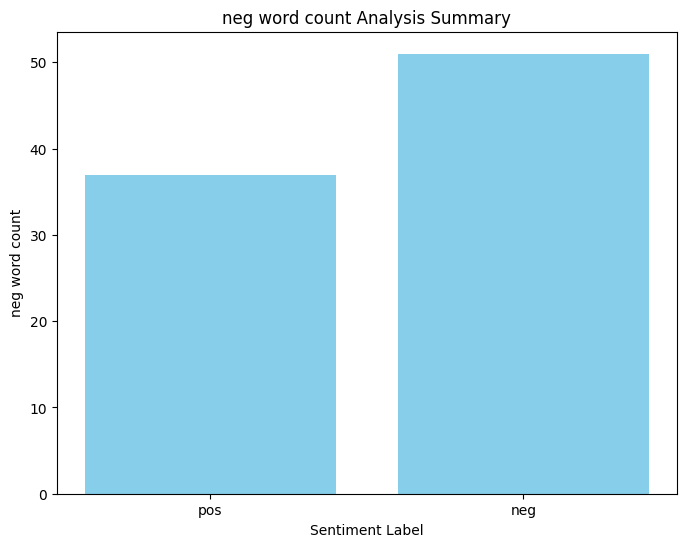

In [1583]:
visualize=BarVisualize(sentiment_data['sentiment_label'],sentiment_data['neg_word_count'],
                       y_label="neg word count",x_label="Sentiment Label",color='skyblue',
                       title='neg word count Analysis Summary',grid=False)
visualize.visualize()

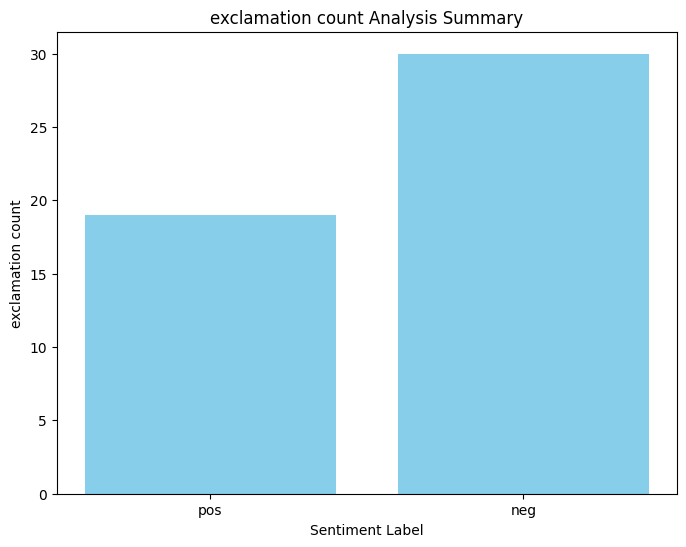

In [1584]:
visualize=BarVisualize(sentiment_data['sentiment_label'],sentiment_data['exclamation_count'],
                       y_label="exclamation count",x_label="Sentiment Label",color='skyblue',
                       title='exclamation count Analysis Summary',grid=False)
visualize.visualize()

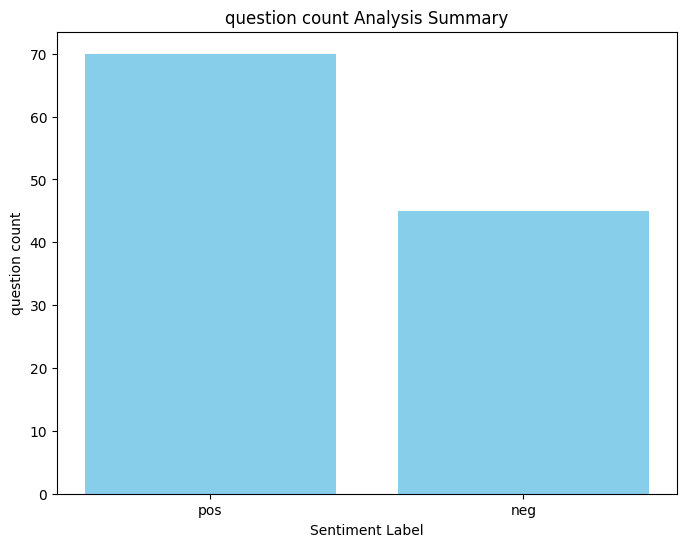

In [1585]:
visualize=BarVisualize(sentiment_data['sentiment_label'],sentiment_data['question_count'],
                       y_label="question count",x_label="Sentiment Label",color='skyblue',
                       title='question count Analysis Summary',grid=False)
visualize.visualize()

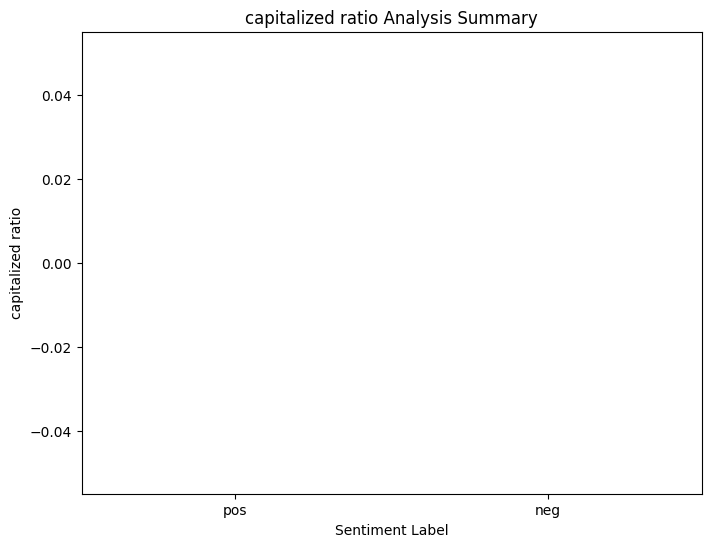

In [1586]:
visualize=BarVisualize(sentiment_data['sentiment_label'],sentiment_data['capitalized_ratio'],
                       y_label="capitalized ratio",x_label="Sentiment Label",color='skyblue',
                       title='capitalized ratio Analysis Summary',grid=False)
visualize.visualize()

# Feature Representation and Engineering

In [1587]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [1588]:
class Vectorizer(ABC):
    def transform(self):
        pass

In [1589]:
class TFIDFVectorizer(Vectorizer):
    def __init__(self,dataframe:pd.DataFrame,prams):
        self.dataframe=dataframe
        self.prams=prams
        self.vectorizer=TfidfVectorizer(**prams)
    
    def transform(self):     
        tfidf_matrix = self.vectorizer.fit_transform(self.dataframe)
        return tfidf_matrix

In [1590]:
vectorizer=TFIDFVectorizer(sentiment_data["text"],{"max_df":0.8,"min_df":2,"ngram_range":(1, 2),    
                            "max_features":8000})

tfidf_matrix=vectorizer.transform()

tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.vectorizer.get_feature_names_out())

sentiment_data = pd.concat([sentiment_data, tfidf_df], axis=1)

In [1591]:
sentiment_data.shape

(1654, 8017)

In [1592]:
import numpy as np

sentiment_data["sentiment_label"] = np.where(sentiment_data["sentiment_label"] == "pos", 1, 0)

In [1593]:
sentiment_data=sentiment_data.drop(
    ["text","capitalized_ratio","ellipsis_count","ing_word_count","ed_word_count","positive_emoji_count",
     "negative_emoji_count","word_count","avg_word_length","unique_word_ratio","unique_word_ratio",
     "positive_word_count","negative_word_count","exclamation_count","question_count","repeated_letters_count",
     "neg_word_count"], axis=1)

In [1594]:
sentiment_data.shape

(1654, 8000)

### Model Training & Evaluation

In [1595]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

In [1596]:
class ModelTrain(ABC):
    def train(self):
        pass

class ModelEvaluate(ABC):
    def evaluate(self,model):
        pass

In [1597]:
class GaussianNBTrain(ModelTrain):
    def __init__(self,X_train,y_train,priors=None,var_smoothing=1e-9):
        self.X_train=X_train
        self.y_train=y_train
        self.priors=priors
        self.var_smoothing=var_smoothing
        self.model=None
        
    def train(self):
        gnb = GaussianNB(priors=self.priors,var_smoothing=self.var_smoothing)
        gnb.fit(self.X_train,self.y_train)
        self.model=gnb
        return gnb

class SVCTrain(ModelTrain):
    def __init__(self,X_train,y_train,params):
        self.X_train=X_train
        self.y_train=y_train
        self.params=params
        self.model=None
    
    def train(self):
        svc=SVC(**self.params)
        svc.fit(self.X_train,self.y_train)
        self.model=svc
        return svc

class RandomForestTrain(ModelTrain):
    def __init__(self,X_train,y_train,params):
        self.X_train=X_train
        self.y_train=y_train
        self.params=params
        self.model=None
    
    def train(self):
        rf = RandomForestClassifier(**self.params)
        rf.fit(self.X_train,self.y_train)
        self.model=rf
        return rf

class LogisticRegressionTrain(ModelTrain):
    def __init__(self,X_train,y_train,params):
        self.X_train=X_train
        self.y_train=y_train
        self.params=params
        self.model=None
    
    def train(self):
        logreg = LogisticRegression(**self.params)
        logreg.fit(self.X_train,self.y_train)
        self.model=logreg
        return logreg

In [1598]:
class AcuracyEvaluate(ModelEvaluate):
    def __init__(self,X_test,y_test):
        self.X_test=X_test
        self.y_test=y_test
    
    def evaluate(self,model):
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        return accuracy

class PrecisionEvaluate(ModelEvaluate):
    def __init__(self,X_test,y_test):
        self.X_test=X_test
        self.y_test=y_test
    
    def evaluate(self,model):
        y_pred = model.predict(self.X_test)
        precision = precision_score(y_test, y_pred)
        return precision

class RecallEvaluate(ModelEvaluate):
    def __init__(self,X_test,y_test):
        self.X_test=X_test
        self.y_test=y_test
    
    def evaluate(self,model):
        y_pred = model.predict(self.X_test)
        recall = recall_score(y_test, y_pred)
        return recall

class F1Evaluate(ModelEvaluate):
    def __init__(self,X_test,y_test,default="binary"):
        self.X_test=X_test
        self.y_test=y_test
        self.default=default
    
    def evaluate(self,model):
        y_pred = model.predict(self.X_test)
        f1 = f1_score(y_test, y_pred, average=self.default)
        return f1

class KFoldEvaluate(ModelEvaluate):
    def __init__(self,X_train,y_train,scoring,params):
        self.X_train=X_train
        self.y_train=y_train
        self.scoring=scoring
        self.params=params
    
    def evaluate(self,model):
        k_fold = KFold(**self.params)
        cv_scores = cross_validate(model, self.X_train, self.y_train, cv=k_fold, scoring=self.scoring,return_train_score=True)
        return cv_scores

class CrossValidationEvaluate(ModelEvaluate):
    def __init__(self,X_train,y_train,scoring,params):
        self.X_train=X_train
        self.y_train=y_train
        self.scoring=scoring
        self.params=params
    
    def evaluate(self,model):
        k_fold = KFold(**self.params)
        cv_scores = cross_val_score(model, self.X_train, self.y_train, cv=k_fold, scoring=self.scoring)
        return cv_scores
        
class CompareAccuracyEvaluate(ModelEvaluate):
    def __init__(self,X_train,y_train,X_test,y_test):
        self.X_train=X_train
        self.y_train=y_train
        self.X_test=X_test
        self.y_test=y_test
    
    def evaluate(self,model):
        train_evaluate = AcuracyEvaluate(self.X_train,self.y_train)
        test_evaluate = AcuracyEvaluate(self.X_test,self.y_test)
        
        train_accuracy = train_evaluate.evaluate(model)
        test_accuracy = test_evaluate.evaluate(model)
        
        if train_accuracy > test_accuracy:
            return 1
        elif train_accuracy < test_accuracy:
            return -1
        return 0

class ClassificationReportEvaluate(ModelEvaluate):
    def __init__(self,X_test,y_test):
        self.X_test=X_test
        self.y_test=y_test
    
    def evaluate(self,model):
        y_pred = model.predict(self.X_test)
        report = classification_report(self.y_test, y_pred)
        return report

In [1599]:
class Printer(ABC):
    @abstractmethod
    def print(self):
        pass

In [1600]:
class EvaluatePrinter(Printer):
    def __init__(self,model,X_train,y_train,X_test,y_test):
        self.X_train=X_train
        self.y_train=y_train
        self.X_test=X_test
        self.y_test=y_test
        self.model=model

    def print(self):
        print(f"accuracy = {accuracy_evaluate.evaluate(self.model)}")
        print(f"precision = {precision_evaluate.evaluate(self.model)}")
        print(f"recall = {recall_evaluate.evaluate(self.model)}")
        print(f"f1 = {f1_evaluate.evaluate(self.model)}")
        
        compare_evaluate=CompareAccuracyEvaluate(self.X_train,self.y_train,self.X_test,self.y_test)
        compare_accuracy=compare_evaluate.evaluate(self.model)
        print("Compare Accuracy Evaluate:")
        if compare_accuracy == 1:
            print("Train Accuracy > Test Accuracy")
        elif compare_accuracy == -1:
            print("Train Accuracy < Test Accuracy")
        else:
            print("Train Accuracy == Test Accuracy")
        
        report_evaluate=ClassificationReportEvaluate(self.X_test,self.y_test)
        report=report_evaluate.evaluate(self.model)
        print("Classification Report")
        print(report)

class EvaluatePrinterScale(Printer):
    def __init__(self,model,X_train,y_train,X_test,y_test):
        self.X_train=X_train
        self.y_train=y_train
        self.X_test=X_test
        self.y_test=y_test
        self.model=model

    def print(self):
        print(f"accuracy = {accuracy_evaluate_scale.evaluate(self.model)}")
        print(f"precision = {precision_evaluate_scale.evaluate(self.model)}")
        print(f"recall = {recall_evaluate_scale.evaluate(self.model)}")
        print(f"f1 = {f1_evaluate_scale.evaluate(self.model)}")
        
        compare_evaluate=CompareAccuracyEvaluate(self.X_train,self.y_train,self.X_test,self.y_test)
        compare_accuracy=compare_evaluate.evaluate(self.model)
        print("Compare Accuracy Evaluate:")
        if compare_accuracy == 1:
            print("Train Accuracy > Test Accuracy")
        elif compare_accuracy == -1:
            print("Train Accuracy < Test Accuracy")
        else:
            print("Train Accuracy == Test Accuracy")
        
        report_evaluate=ClassificationReportEvaluate(self.X_test,self.y_test)
        report=report_evaluate.evaluate(self.model)
        print("Classification Report")
        print(report)

In [1601]:
class TrainingValidationPlot(Visualize):
    def __init__(self, cv_results):
        self.cv_results = cv_results
        
    def visualize(self):
        train_acc = self.cv_results['train_accuracy']
        val_acc = self.cv_results['test_accuracy']
        train_loss = -self.cv_results['train_neg_log_loss']
        val_loss = -self.cv_results['test_neg_log_loss']

        folds = np.arange(1, len(train_acc) + 1)

        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

        ax1.plot(folds, train_acc, 
                 marker='o', linestyle='--', color='blue', label='Training Accuracy')
        ax1.plot(folds, val_acc, 
                 marker='s', linestyle='-', color='orange', label='Validation Accuracy')
        ax1.set_xlabel('Fold Number')
        ax1.set_ylabel('Accuracy')
        ax1.set_title('Accuracy Comparison Across Folds')
        ax1.legend()
        ax1.grid(True, linestyle='--', alpha=0.7)

        ax2.plot(folds, train_loss, 
                 marker='o', linestyle='--', color='blue', label='Training Loss')
        ax2.plot(folds, val_loss, 
                 marker='s', linestyle='-', color='orange', label='Validation Loss')
        ax2.set_xlabel('Fold Number')
        ax2.set_ylabel('Loss')
        ax2.set_title('Log Loss Comparison Across Folds')
        ax2.legend()
        ax2.grid(True, linestyle='--', alpha=0.7)

        plt.tight_layout()
        plt.show()

In [1602]:
from sklearn.model_selection import train_test_split

X_train, X_test= train_test_split(sentiment_data,test_size=0.2,random_state=42)

In [1603]:
y_train=X_train["sentiment_label"]
y_test=X_test["sentiment_label"]
X_train=X_train.drop("sentiment_label",axis=1)
X_test=X_test.drop("sentiment_label",axis=1)

In [1604]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaler=scaler.fit_transform(X_train)
X_test_scaler=scaler.transform(X_test)

In [1605]:
accuracy_evaluate=AcuracyEvaluate(X_test,y_test)
precision_evaluate=PrecisionEvaluate(X_test,y_test)
recall_evaluate=RecallEvaluate(X_test,y_test)
f1_evaluate=F1Evaluate(X_test,y_test)
k_fold=KFoldEvaluate(X_train,y_train,scoring=["accuracy", "neg_log_loss"],params={"n_splits" :10,
                        "shuffle" : True, "random_state" : 42})


cross_validation_evaluate = CrossValidationEvaluate(X_train,y_train,scoring="accuracy",
                                                    params={"n_splits" :10,"shuffle" : True, "random_state" : 42})


In [1606]:
accuracy_evaluate_scale=AcuracyEvaluate(X_test_scaler,y_test)
precision_evaluate_scale=PrecisionEvaluate(X_test_scaler,y_test)
recall_evaluate_scale=RecallEvaluate(X_test_scaler,y_test)
f1_evaluate_scale=F1Evaluate(X_test_scaler,y_test)

k_fold_scale=KFoldEvaluate(X_train_scaler,y_train,scoring=["accuracy", "neg_log_loss"],params={"n_splits" :10,
                        "shuffle" : True, "random_state" : 42})

cross_validation_evaluate_scale = CrossValidationEvaluate(X_train_scaler,y_train,scoring="accuracy",
                                                    params={"n_splits" :10,"shuffle" : True, "random_state" : 42})

In [1607]:
gnb=GaussianNBTrain(X_train,y_train)
gnb_model=gnb.train()

cross_validation=cross_validation_evaluate.evaluate(gnb_model)
print(f"Cross-Validation Accuracy Scores: {cross_validation}")
print(f"Mean Accuracy Scores: {cross_validation.mean()}")

Cross-Validation Accuracy Scores: [0.66165414 0.73684211 0.7443609  0.62878788 0.65151515 0.65909091
 0.62878788 0.65151515 0.68181818 0.66666667]
Mean Accuracy Scores: 0.6711038961038962


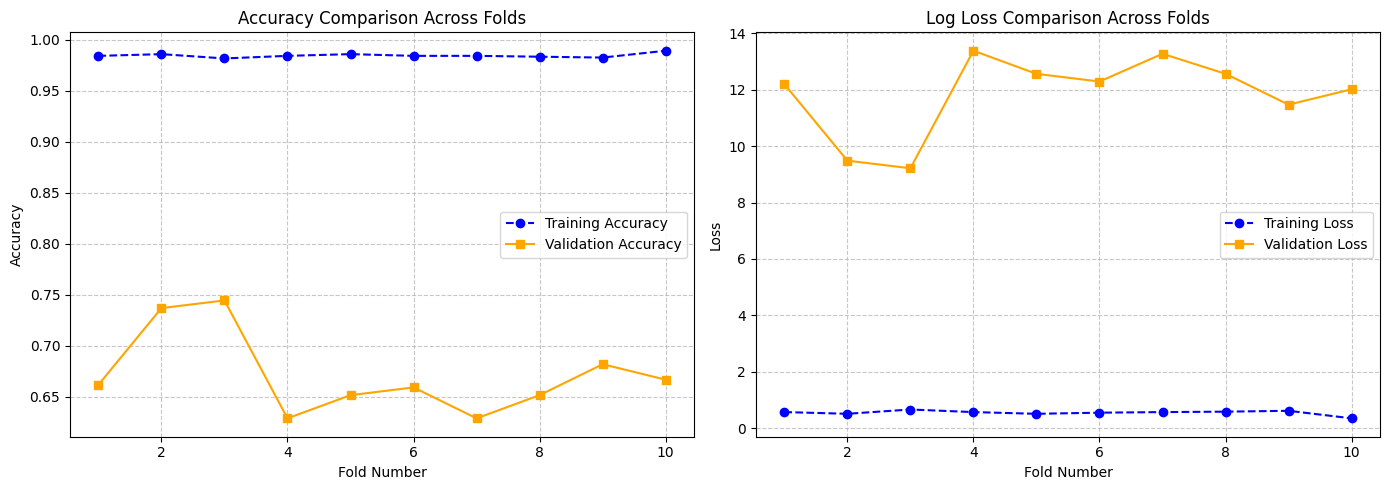

In [1608]:
cv_scores = k_fold.evaluate(gnb_model)
TrainingValidationPlot(cv_scores).visualize()

In [1609]:
evaluate_printer=EvaluatePrinter(gnb_model,X_train,y_train,X_test,y_test)
evaluate_printer.print()

accuracy = 0.6978851963746223
precision = 0.7297297297297297
recall = 0.6428571428571429
f1 = 0.6835443037974683
Compare Accuracy Evaluate:
Train Accuracy == Test Accuracy
Classification Report
              precision    recall  f1-score   support

           0       0.67      0.75      0.71       163
           1       0.73      0.64      0.68       168

    accuracy                           0.70       331
   macro avg       0.70      0.70      0.70       331
weighted avg       0.70      0.70      0.70       331



In [1610]:
random_forest=RandomForestTrain(X_train,y_train,params={'criterion': 'gini','max_depth': 20,'max_features': 'sqrt',
                                                    'min_samples_leaf': 1,'min_samples_split': 2,'n_estimators': 200})
random_forest_model=random_forest.train()

cross_validation=cross_validation_evaluate.evaluate(random_forest_model)
print(f"Cross-Validation Accuracy Scores: {cross_validation}")
print(f"Mean Accuracy Scores: {cross_validation.mean()}")

Cross-Validation Accuracy Scores: [0.79699248 0.84962406 0.84210526 0.77272727 0.84090909 0.81818182
 0.75757576 0.83333333 0.82575758 0.86363636]
Mean Accuracy Scores: 0.820084301663249


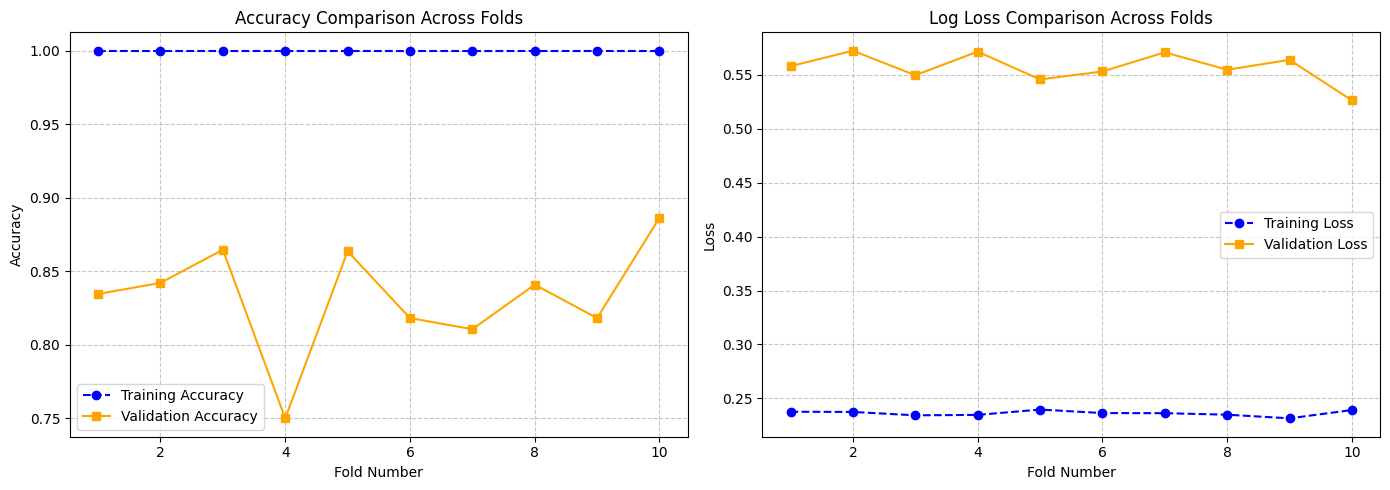

In [1611]:
cv_scores = k_fold.evaluate(random_forest_model)
TrainingValidationPlot(cv_scores).visualize()

In [1612]:
evaluate_printer=EvaluatePrinter(random_forest_model,X_train,y_train,X_test,y_test)
evaluate_printer.print()

accuracy = 0.824773413897281
precision = 0.9166666666666666
recall = 0.7202380952380952
f1 = 0.8066666666666666
Compare Accuracy Evaluate:
Train Accuracy == Test Accuracy
Classification Report
              precision    recall  f1-score   support

           0       0.76      0.93      0.84       163
           1       0.92      0.72      0.81       168

    accuracy                           0.82       331
   macro avg       0.84      0.83      0.82       331
weighted avg       0.84      0.82      0.82       331



In [1613]:
logistic=LogisticRegressionTrain(X_train,y_train,{"C":10,"penalty":'l2',"solver":'liblinear',
                                                        "class_weight":'balanced',"random_state":42,"max_iter":1000})
logistic_model=logistic.train()

cross_validation=cross_validation_evaluate_scale.evaluate(logistic_model)
print(f"Cross-Validation Accuracy Scores: {cross_validation}")
print(f"Mean Accuracy Scores: {cross_validation.mean()}")

Cross-Validation Accuracy Scores: [0.86466165 0.84962406 0.88721805 0.84848485 0.82575758 0.81818182
 0.81060606 0.83333333 0.84090909 0.84090909]
Mean Accuracy Scores: 0.8419685577580316


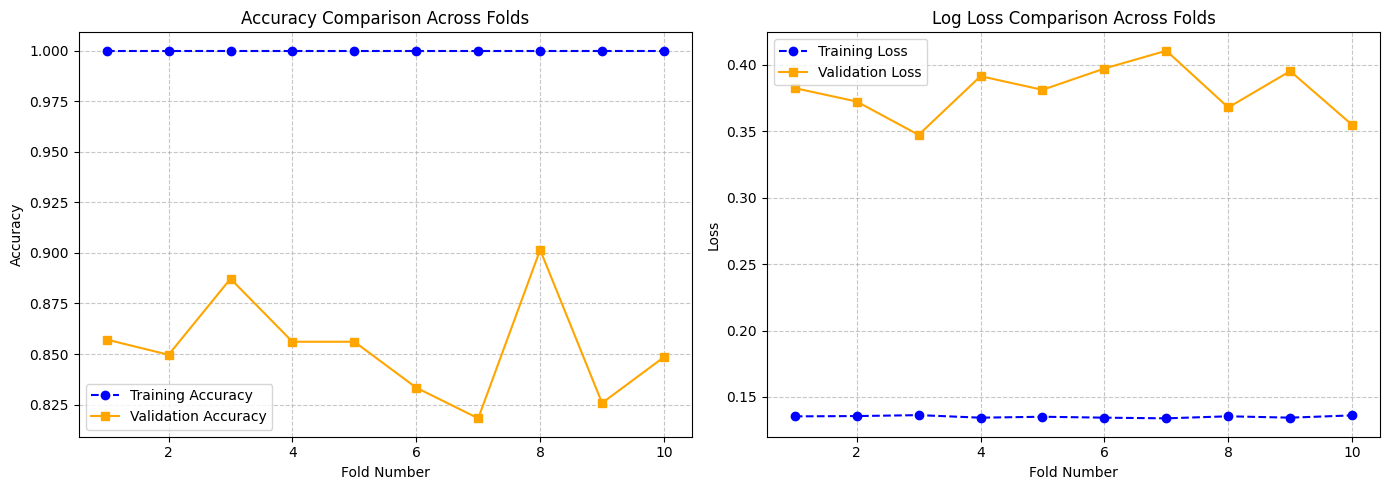

In [1614]:
cv_scores = k_fold.evaluate(logistic_model)
TrainingValidationPlot(cv_scores).visualize()

In [1615]:
evaluate_printer=EvaluatePrinter(logistic_model,X_train,y_train,X_test,y_test)
evaluate_printer.print()

accuracy = 0.8700906344410876
precision = 0.8787878787878788
recall = 0.8630952380952381
f1 = 0.8708708708708709
Compare Accuracy Evaluate:
Train Accuracy == Test Accuracy
Classification Report
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       163
           1       0.88      0.86      0.87       168

    accuracy                           0.87       331
   macro avg       0.87      0.87      0.87       331
weighted avg       0.87      0.87      0.87       331



In [1616]:
coefficients = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': logistic_model.coef_[0]
})

coefficients_sorted = coefficients.sort_values(by='Coefficient', ascending=False)
coefficients_sorted

,Feature,Coefficient
5282,perfect,3.917228
7606,well,3.723332
2898,great,3.243696
2651,fun,3.095017
3535,jacki,2.579219
...,...,...
764,bore,-3.834667
7897,worst,-3.839900
7561,wast,-4.138737
5388,plot,-4.183729


In [1617]:
import pickle
import os

if not os.path.exists('save'):
    os.mkdir('save')

with open("save/model.pkl", "wb") as file:
    pickle.dump(logistic_model,file)
    
with open("save/vectorizer.pkl", "wb") as file:
    pickle.dump(vectorizer.vectorizer,file)

In [1618]:
def test_on_your_data(path,model):
    data_load=DataLoder(path,labels=["neg","pos"])
    data=data_load.load_data()

    preprocessing_pipeline=PreprocessingPipeline([
    NegationHandling(),
    TextStemmer(),
    ConvertEmoji(),
    RemoveSpecialCharacters(),
    ConvertNumberToWords(),
    RemoveStopWords()
    ])

    def text_preprocessing(text:str):
        preprocessed_text=preprocessing_pipeline.transform(text)
        return preprocessed_text

    data["text"]=data["text"].apply(text_preprocessing)

    tfidf_matrix=vectorizer.vectorizer.transform(data["text"])

    tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.vectorizer.get_feature_names_out())

    data = pd.concat([data, tfidf_df], axis=1)

    data["sentiment_label"] = np.where(data["sentiment_label"] == "pos", 1, 0)

    data=data.drop(["text"], axis=1)

    y_test=data["sentiment_label"]
    X_test=data.drop("sentiment_label",axis=1)
    
    y_pred=model.predict(X_test)
    
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)
    f1 = f1_score(y_test,y_pred)
 
    print(f"accuracy = {accuracy}")
    print(f"precision = {precision}")
    print(f"recall = {recall}")
    print(f"f1 = {f1}")





In [1619]:
test_on_your_data("testdata",logistic_model)

accuracy = 1.0
precision = 1.0
recall = 1.0
f1 = 1.0
